<a href="https://colab.research.google.com/github/KaanErdogdu/7_Bootcamo_Siniflandirma_Problemleri/blob/master/Odev__7_2_Lojistik_Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

In [5]:
titanic_s = pd.read_csv('titanic_train.csv')
titanic_s.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
##titanic_s=titanic.merge(titanic_ss,on="PassengerId",how="left")
##titanic_s.head()

In [7]:
titanic_sss= titanic_s[["Sex","Age","SibSp","Parch","Ticket","Fare","Survived"]]

titanic_s.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_sss["kadin_mi"] = pd.get_dummies(titanic_s.Sex, drop_first=True)
titanic_sss.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sex,Age,SibSp,Parch,Ticket,Fare,Survived,kadin_mi
0,male,22.0,1,0,A/5 21171,7.2500,0,1
1,female,38.0,1,0,PC 17599,71.2833,1,0
2,female,26.0,0,0,STON/O2. 3101282,7.9250,1,0
3,female,35.0,1,0,113803,53.1000,1,0
4,male,35.0,0,0,373450,8.0500,0,1


In [9]:
titanic_s2=titanic_sss[["kadin_mi","Age","SibSp","Parch","Fare","Survived"]]
titanic_s2.head()

,kadin_mi,Age,SibSp,Parch,Fare,Survived
0,1,22.0,1,0,7.2500,0
1,0,38.0,1,0,71.2833,1
2,0,26.0,0,0,7.9250,1
3,0,35.0,1,0,53.1000,1
4,1,35.0,0,0,8.0500,0


In [10]:
titanic_s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kadin_mi  891 non-null    uint8  
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Survived  891 non-null    int64  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 35.8 KB


In [11]:
titanic_s2.isnull().sum()

kadin_mi      0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [ ]:
#Age boş ise o satırı sil nasıl yapılıyordu

In [12]:
titanic_s3=titanic_s2.dropna(subset=["Age","Fare"])
titanic_s3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kadin_mi  714 non-null    uint8  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   Fare      714 non-null    float64
 5   Survived  714 non-null    int64  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 34.2 KB


In [13]:
##titanic_s2["Age"].fillna(titanic_s2["Age"].mean(), inplace=True)


In [15]:
titanic_s3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kadin_mi  714 non-null    uint8  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   Fare      714 non-null    float64
 5   Survived  714 non-null    int64  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 34.2 KB


In [16]:
#X = titanic_s2[["kadin_mi","Age","Ticket"]]
X = titanic_s3[["Age","Fare","kadin_mi"]]
y = titanic_s3.Survived
print(X[:5])
print(y[:5])

    Age     Fare  kadin_mi
0  22.0   7.2500         1
1  38.0  71.2833         0
2  26.0   7.9250         0
3  35.0  53.1000         0
4  35.0   8.0500         1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


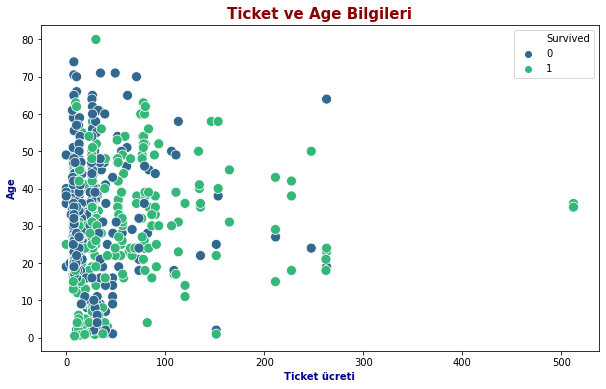

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.scatterplot(X["Fare"], X["Age"], s=100, hue = y, palette = 'viridis')
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.title("Ticket ve Age Bilgileri", fontdict = baslik_font)
plt.xlabel("Ticket ücreti", fontdict = eksen_font)
plt.ylabel("Age", fontdict = eksen_font)
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [19]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [20]:
log_reg.fit(X_eğitim, y_eğitim)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.79
Modelin test verisindeki doğruluğu   : 0.76


In [22]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.79
Modelin test verisindeki doğruluğu   : 0.76


In [24]:
titanic_s3.describe()

,kadin_mi,Age,SibSp,Parch,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.634454,29.699118,0.512605,0.431373,34.694514,0.406162
std,0.481921,14.526497,0.929783,0.853289,52.918930,0.491460
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,1.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,1.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000


In [26]:
tahmin_değerleri = np.array([[38,88,1] , [66,12,0]])
print(log_reg.predict(tahmin_değerleri))

[0 1]


In [27]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)  

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.672504,0.664336
1,0.010,0.695271,0.713287
2,0.100,0.784588,0.755245
3,1.000,0.788091,0.755245
4,10.000,0.788091,0.755245
5,100.000,0.788091,0.755245
6,1000.000,0.788091,0.755245
